In [1]:
import numpy as np
import pandas as pd

In [3]:
### the same as numpy

# nan = Not a Number

pd.isnull(np.nan)

True

In [4]:
pd.isnull(None)

True

In [5]:
### isna == isnull ###
pd.isna(np.nan)

True

In [6]:
pd.isna(None)

True

In [7]:
### NOT NULL ###

pd.notnull(None)

False

In [8]:
pd.notnull(3)

True

In [9]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [10]:
pd.isnull(pd.DataFrame({
    'A': [1, np.nan, 7],
    'B': [np.nan, 1, 3],
    'C': [np.nan, 2, np.nan]
}))

,A,B,C
0,False,True,True
1,True,False,False
2,False,False,True


In [11]:
s = pd.Series([1,2,3, np.nan, np.nan, 4])
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [12]:
# true and false are 1 and 0 (boolean values)
# sum will provide a sum of ones and zeros
pd.notnull(s).sum()

4

In [13]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [14]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [15]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

### Dropping null values

In [16]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [17]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [20]:
df = pd.DataFrame({
    'A': [1, np.nan, 7],
    'B': [np.nan, 1, 3],
    'C': [np.nan, 2, np.nan]
})
df

,A,B,C
0,1.0,NaN,NaN
1,NaN,1.0,2.0
2,7.0,3.0,NaN


In [21]:
df.shape

(3, 3)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       2 non-null      float64
 1   B       2 non-null      float64
 2   C       1 non-null      float64
dtypes: float64(3)
memory usage: 200.0 bytes


In [22]:
df.isnull()

,A,B,C
0,False,True,True
1,True,False,False
2,False,False,True


In [24]:
df.sum()

A    8.0
B    4.0
C    2.0
dtype: float64

In [27]:
df.isnull().sum()

A    1
B    1
C    2
dtype: int64

In [28]:
df.dropna()

,A,B,C


In [29]:
df.dropna(axis=1)

""
0
1
2


In [30]:
df.dropna(how='all')

,A,B,C
0,1.0,NaN,NaN
1,NaN,1.0,2.0
2,7.0,3.0,NaN


In [31]:
df.dropna(how='any') # default behaviour

,A,B,C


In [33]:
df.dropna(thresh=2)

,A,B,C
1,NaN,1.0,2.0
2,7.0,3.0,NaN


In [34]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [35]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [36]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [37]:
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [38]:
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

In [39]:
### paziti s forward fill i backwards fill jer početna i zadnja vrijednost neće biti promijenjena, tj ostat će null
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [42]:
### the same is with the DataFrames
df

,A,B,C
0,1.0,NaN,NaN
1,NaN,1.0,2.0
2,7.0,3.0,NaN


In [45]:
df.fillna({'A':0, 'B':99, 'C':df['C'].mean()})

,A,B,C
0,1.0,99.0,2.0
1,0.0,1.0,2.0
2,7.0,3.0,2.0


In [46]:
df.fillna(method='ffill',axis=1)

,A,B,C
0,1.0,1.0,1.0
1,NaN,1.0,2.0
2,7.0,3.0,3.0


In [47]:
df.fillna(method='bfill', axis=0)

,A,B,C
0,1.0,1.0,2.0
1,7.0,1.0,2.0
2,7.0,3.0,NaN


In [48]:
df.fillna(method='ffill', axis=0)

,A,B,C
0,1.0,NaN,NaN
1,1.0,1.0,2.0
2,7.0,3.0,2.0


## Cleaning non-null values

In [49]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '??'],
    'Age': [29,30,24,290,25]
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,??,25


In [50]:
df['Sex'].unique()

array(['M', 'F', 'D', '??'], dtype=object)

In [52]:
df['Sex'].value_counts()

F     2
M     1
D     1
??    1
Name: Sex, dtype: int64

In [53]:
df['Sex'].replace('D','F')

0     M
1     F
2     F
3     F
4    ??
Name: Sex, dtype: object

In [54]:
df['Sex'].replace({'D':'F', 'N':'M'})

0     M
1     F
2     F
3     F
4    ??
Name: Sex, dtype: object

In [56]:
df.replace({
    'Sex': {'D': 'F',
           'N':'M'},
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,??,25


In [57]:
df[df['Age'] > 100]

,Sex,Age
3,D,290


In [58]:
df.loc[df['Age'] > 100, 'Age']

3    290
Name: Age, dtype: int64

In [59]:
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10

In [63]:
df

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,??,25.0


### duplicates

In [62]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [64]:
df = pd.DataFrame({
    'Sex': ['M', 'M', 'F', 'D', '??'],
    'Age': [29,29,24,290,25]
})

df

,Sex,Age
0,M,29
1,M,29
2,F,24
3,D,290
4,??,25


In [65]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [66]:
df.duplicated(keep='last')

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [67]:
df.duplicated(keep=False)

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [68]:
df.drop_duplicates()

,Sex,Age
0,M,29
2,F,24
3,D,290
4,??,25


In [69]:
df.drop_duplicates(keep='last')

,Sex,Age
1,M,29
2,F,24
3,D,290
4,??,25


#### if there are several column values that can be and shouldn't be considered as duplicates, a **subset** method is used

In [72]:
df.duplicated(subset=['Sex'])

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [71]:
df

,Sex,Age
0,M,29
1,M,29
2,F,24
3,D,290
4,??,25


In [73]:
df.duplicated(subset=['Sex'], keep='last')

0     True
1    False
2    False
3    False
4    False
dtype: bool

### STRING HANDLING ###

In [74]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US_1',
        '1990?_M_US_1',
        '1992_F_US_2',
        '1970_M_    IT_1',
        '1985_F_I   T_2'
    ]
})

df

,Data
0,1987_M_US_1
1,1990?_M_US_1
2,1992_F_US_2
3,1970_M_ IT_1
4,1985_F_I T_2


In [75]:
## given the column type, that type has its special method
# objects types are actually strings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    5 non-null      object
dtypes: object(1)
memory usage: 168.0+ bytes


In [76]:
df['Data'].str.split('_')

0        [1987, M, US, 1]
1       [1990?, M, US, 1]
2        [1992, F, US, 2]
3    [1970, M,     IT, 1]
4     [1985, F, I   T, 2]
Name: Data, dtype: object

In [77]:
df['Data'].str.split('_', expand=True)
# expand creates a dataframe

,0,1,2,3
0,1987,M,US,1
1,1990?,M,US,1
2,1992,F,US,2
3,1970,M,IT,1
4,1985,F,I T,2


In [78]:
df = df['Data'].str.split('_', expand=True)

In [79]:
df.columns = ['Year', 'Sex', 'Nation', 'Children']
df

,Year,Sex,Nation,Children
0,1987,M,US,1
1,1990?,M,US,1
2,1992,F,US,2
3,1970,M,IT,1
4,1985,F,I T,2


In [80]:
df['Year']

0     1987
1    1990?
2     1992
3     1970
4     1985
Name: Year, dtype: object

In [81]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3    False
4    False
Name: Year, dtype: bool

In [83]:
df['Nation'].str.strip()

0       US
1       US
2       US
3       IT
4    I   T
Name: Nation, dtype: object

In [84]:
df['Nation'].str.replace(' ','')

0    US
1    US
2    US
3    IT
4    IT
Name: Nation, dtype: object

In [85]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))

<ipython-input-85-49770a497c9e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

## Visualizing data ##

In [86]:
import matplotlib.pyplot as plt

%matplotlib inline

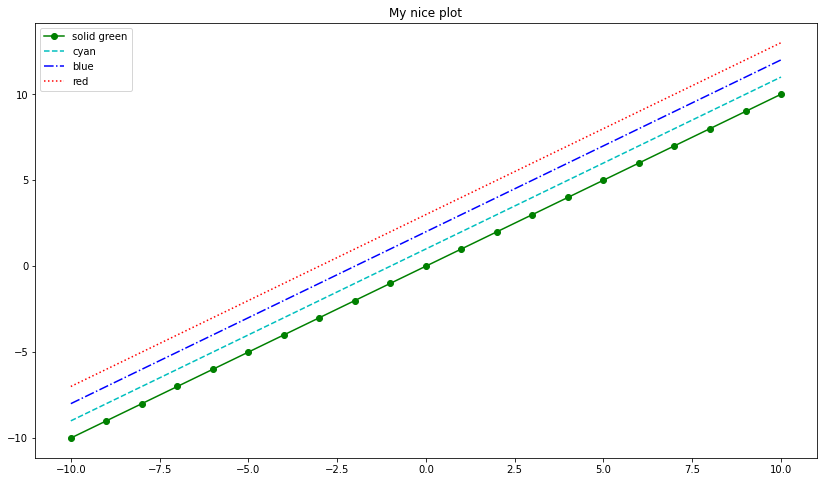

In [89]:
x = np.arange(-10,11)

fig, axes = plt.subplots(figsize=(14,8))

axes.plot(x, x+0, '-og', label='solid green')
axes.plot(x, x+1, '--c', label='cyan')
axes.plot(x, x+2, '-.b', label='blue')
axes.plot(x, x+3, ':r', label='red')

axes.set_title('My nice plot')

axes.legend()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

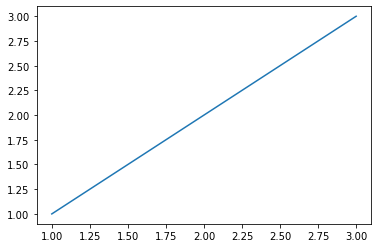

In [91]:
plot_objects = plt.subplots()
fig,ax = plot_objects

ax.plot([1,2,3],[1,2,3])

plot_objects


(<Figure size 1008x576 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

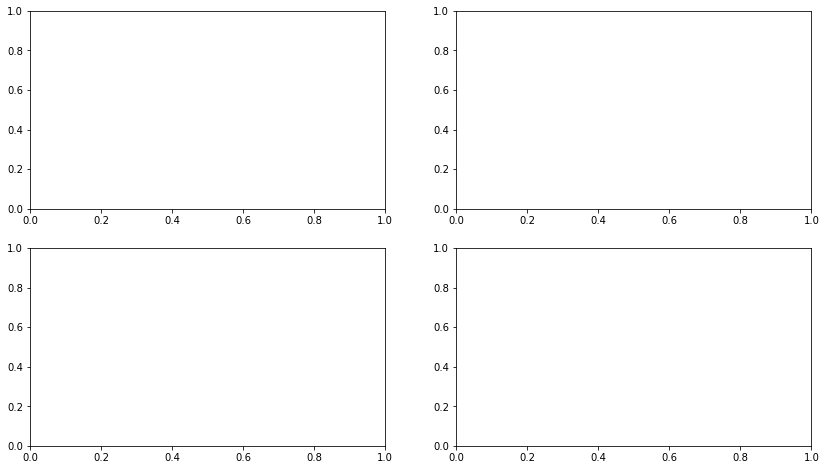

In [92]:
plot_objects = plt.subplots(nrows=2,ncols=2, figsize=(14,8))

fig, ((ax1,ax2), (ax3,ax4)) = plot_objects

plot_objects


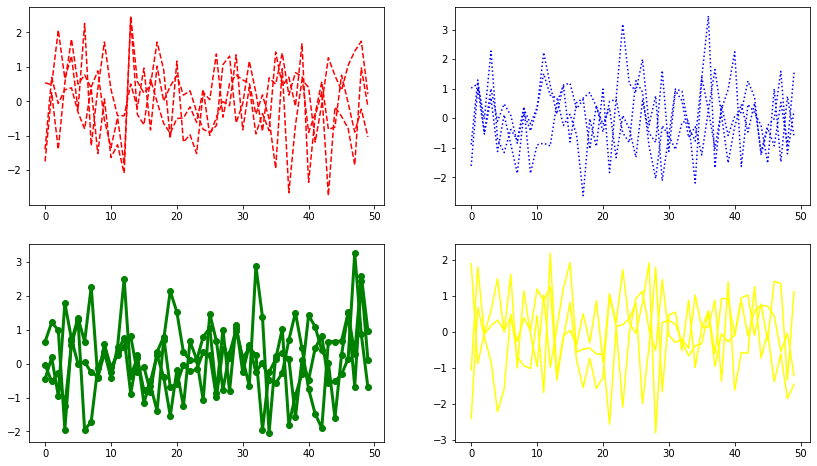

In [95]:
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='blue', linestyle=':')
ax3.plot(np.random.randn(50), c='green', marker='o', linewidth=3.0)
ax4.plot(np.random.randn(50), c='yellow')

fig

### subplot2grid

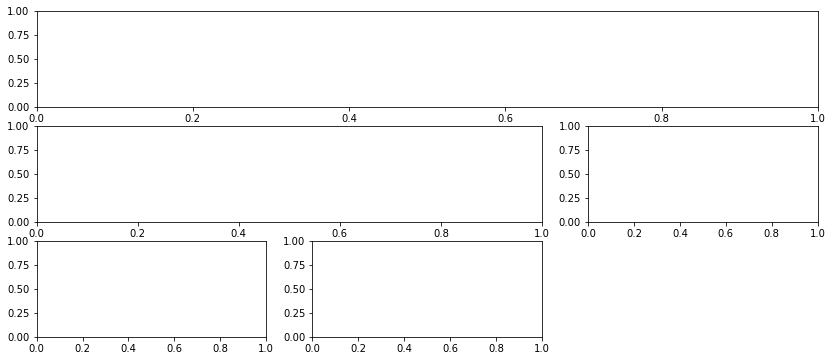

In [99]:
plt.figure(figsize=(14,6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), colspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

### Scatter plot

In [102]:
N = 50
x = np.random.randn(N)
y = np.random.randn(N)
colors = np.random.randn(N)
area = np.pi * (20 * np.random.rand(N))**2

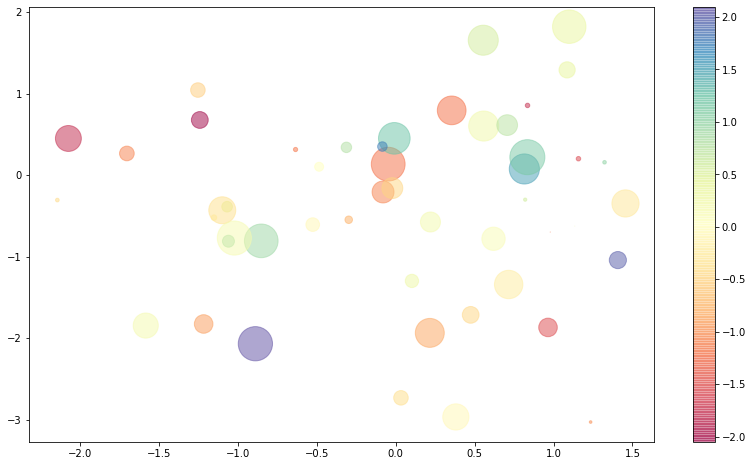

In [104]:
### with the size of the bubble and with the colormap, another two dimensions (along with x and y) can be plotted!

plt.figure(figsize=(14,8))

plt.scatter(x,y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

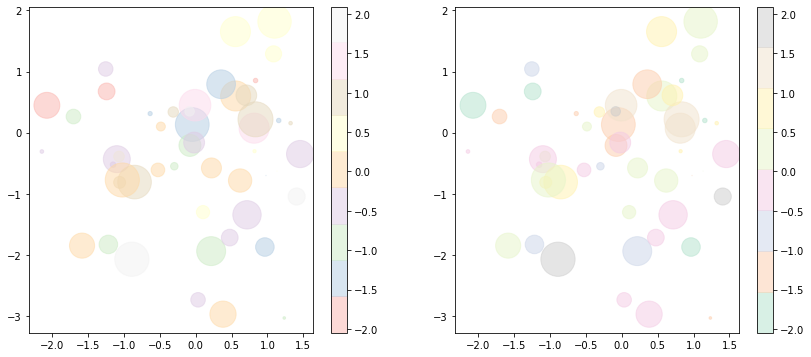

In [106]:
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x,y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x,y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

### Histograms 

In [109]:
values = np.random.randn(1000)

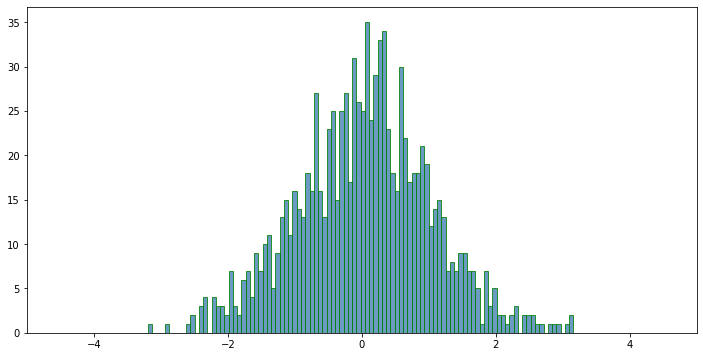

In [111]:
plt.subplots(figsize=(12,6))

plt.hist(values, bins=100, alpha=0.8,
        histtype='bar', color='steelblue',
        edgecolor='green')

plt.xlim(xmin=-5, xmax=5)

plt.show()

In [112]:
# fig.savefig('hist.png')

### KDE (kernel density estimation)

In [113]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

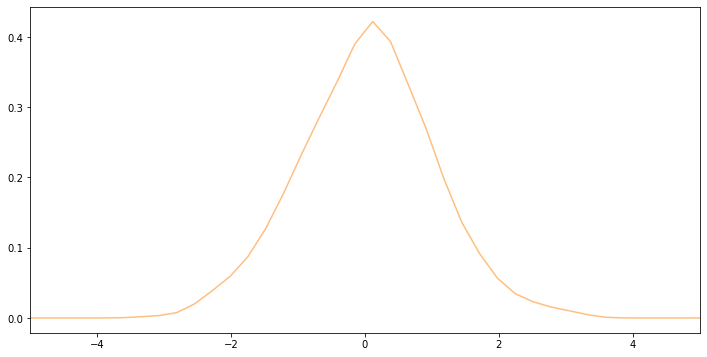

In [115]:
plt.subplots(figsize=(12,6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

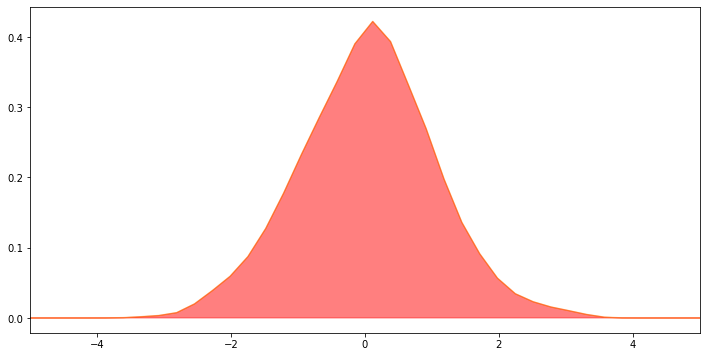

In [116]:
plt.subplots(figsize=(12,6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), alpha=0.5, color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='red')
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Combine plots 

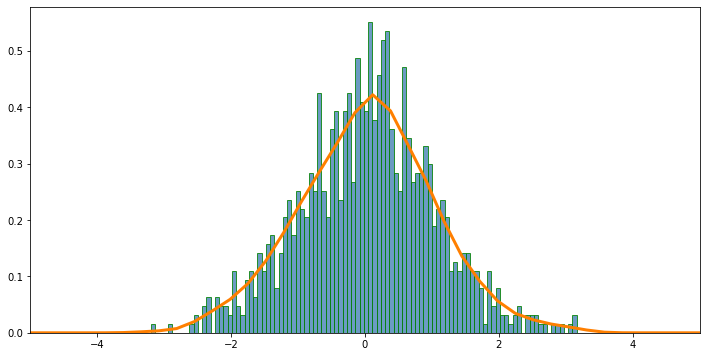

In [127]:
plt.subplots(figsize=(12,6))

plt.hist(values, bins=100, alpha=0.8, density=1,
        histtype='bar', color='steelblue',
        edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Bar plots 

In [120]:
Y = np.random.randn(1,5)
Y2 = np.random.randn(1,5)[0]

In [121]:
Y

array([[ 0.52111379, -0.45615917,  0.62242474, -0.09407092,  1.01719933]])

In [122]:
Y2

array([ 2.14994985,  2.49735693, -2.27394792,  0.2779584 , -0.05334072])

In [128]:
# https://stackoverflow.com/questions/47240308/differences-between-numpy-random-rand-vs-numpy-random-randn-in-python

Y = np.random.rand(1,5)[0]
Y2 = np.random.rand(1,5)[0]

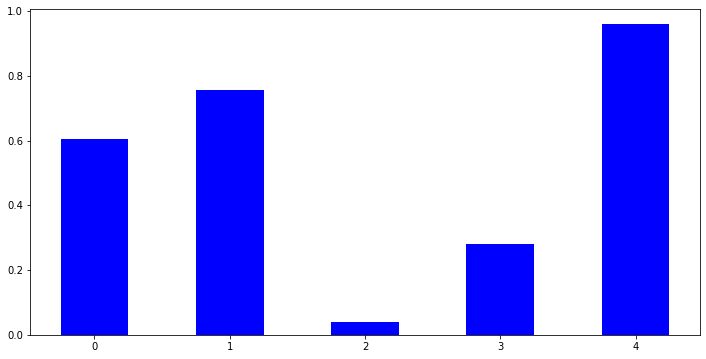

In [129]:
plt.figure(figsize=(12,6))

bar_width = 0.5
plt.bar(np.arange(len(Y)), Y, width=bar_width, color='blue')

plt.show()

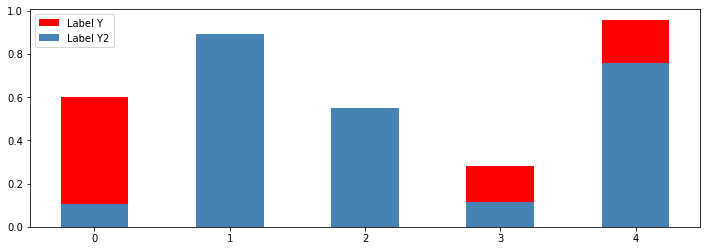

In [130]:
plt.figure(figsize=(12,4))

plt.bar(np.arange(len(Y)), Y, width=bar_width, color='red', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=bar_width, color='steelblue', label='Label Y2')

plt.legend()
plt.show()

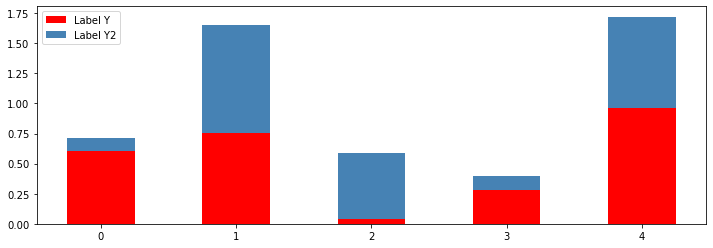

In [131]:
plt.figure(figsize=(12,4))

plt.bar(np.arange(len(Y)), Y, width=bar_width, color='red', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=bar_width, color='steelblue', bottom=Y, label='Label Y2')

plt.legend()
plt.show()

### Boxplots and outlier detection 

In [132]:
values = np.concatenate([np.random.randn(10), np.array([10,15,-10,-15])])

(array([1., 1., 0., 0., 4., 6., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <BarContainer object of 10 artists>)

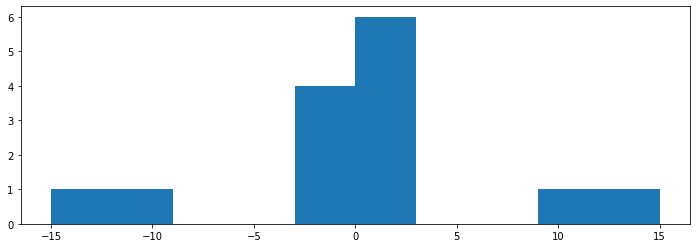

In [133]:
plt.figure(figsize=(12,4))
plt.hist(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe8d07137f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe8d0719be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe8d07109d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe8d071b5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe8d071bdc0>],
 'means': []}

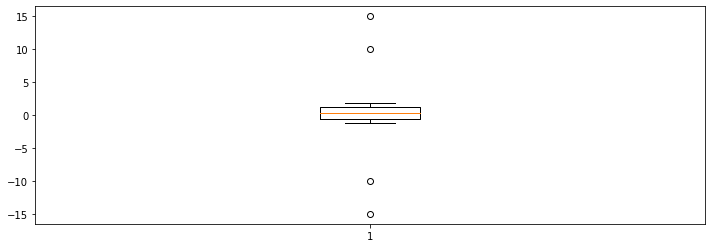

In [134]:
plt.figure(figsize=(12,4))
plt.boxplot(values)